<a href="https://colab.research.google.com/github/ArchaeonSeq/My-Hamoye-Quizzes/blob/main/PearseHamoyeStageE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install prophet model
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error,mean_squared_error
from fbprophet import Prophet

from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [6]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
df = df.rename(columns = {"FullDate" : "ds", "ElecPrice" : "y", 'SysLoad': 'add1','Tmax':'add2', 'GasPrice':'add3'})
df.head()

,ds,add2,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [8]:
df["ds"] = pd.to_datetime(df["ds"])
df.tail()

,ds,add2,add1,add3,y
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [9]:
#df1= df1.set_index('ds')
df.set_index("ds",inplace=True,drop=True)


In [10]:
df_daily= df.resample('D').sum()

# Question 11

Text(0, 0.5, 'ElecPrice')

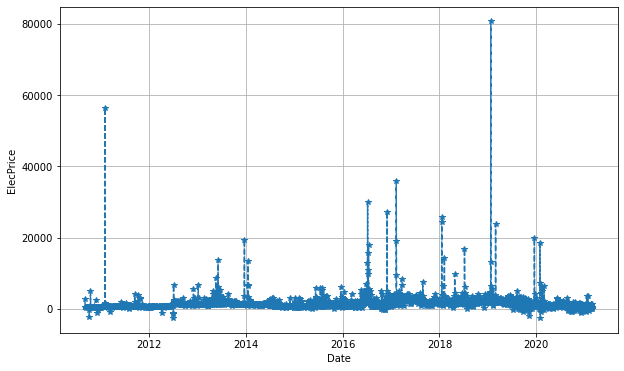

In [11]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.y, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Date' )
plt.ylabel( 'ElecPrice' )

# Question 12

In [12]:
adfuller(df_daily['add1'])
#{"FullDate" : "ds", "ElecPrice" : "y", 'SysLoad': 'add1','Tmax':'add2', 'GasPrice':'add3'})

(-3.6901589888366457,
 0.004253725504574117,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [13]:
adfuller(df_daily['add3'])

(-2.90276669716518,
 0.04502721288462542,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

In [14]:
print('SysLoad p-value:',np.round(adfuller(df_daily['add1'])[1],decimals=6))
print('GasPrice p-value:',np.round(adfuller(df_daily['add3'])[1],decimals=6)) 

SysLoad p-value: 0.004254
GasPrice p-value: 0.045027


# Question 13

In [15]:
print("ElecPrice 10% critical:",np.round(adfuller(df_daily['y'])[4]["5%"],decimals=6))
print("GasPrice 5% critical:",np.round(adfuller(df_daily["add3"])[4]["10%"],decimals=6)) 

ElecPrice 10% critical: -2.862298
GasPrice 5% critical: -2.567174


In [16]:
df_daily.reset_index(inplace=True)

# Question 14

In [17]:
#Train test split the model
train = df_daily.loc[:2756]
test  = df_daily.loc[2757:]
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [18]:
assert len(df_daily) == (len(train)+len(test))

In [19]:
model = Prophet()#daily_seasonality=True )
model.fit(train)
model.component_modes

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [20]:
# making predictions for the next 10 months
X_test = test.drop('y', axis=1)
y_test= test['y']
future = model.make_future_dataframe(periods = 1077, freq = 'D',  include_history=False)
forecast = model.predict(future)
pred = forecast['yhat']
forecast[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper' ]].head()


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2536.337494,139.212540,4890.672845,2691.764386,2691.764386,2691.764386
1,2018-03-21,2689.655459,297.480152,5071.984784,2692.580955,2692.580955,2692.580955
2,2018-03-22,2788.705741,525.370671,5254.367239,2693.397524,2693.397524,2693.397524
3,2018-03-23,2580.977221,281.454592,4946.138088,2694.214093,2694.214093,2694.214093
4,2018-03-24,2256.367941,-294.315873,4696.285868,2695.030663,2695.030663,2695.030663


In [21]:
MAPE= mean_absolute_percentage_error(y_test,pred)*100
print("Prophet Model MAPE score on validation set is :{:.2f} ".format(MAPE))


Prophet Model MAPE score on validation set is :549.48 


# Question 15

In [22]:
RMSE= mean_squared_error(y_test,pred, squared=False)
print("Prophet Model RMSE score on validation set is : {:.2f} ".format(RMSE))

Prophet Model RMSE score on validation set is : 3218.16 


# Question 16

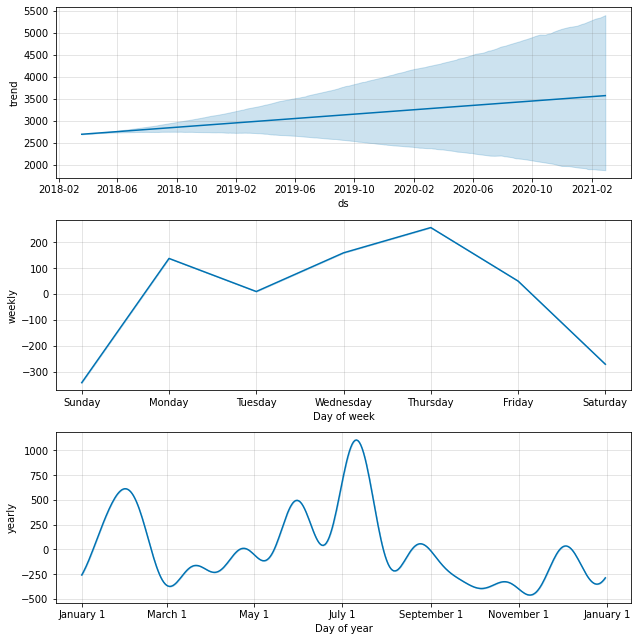

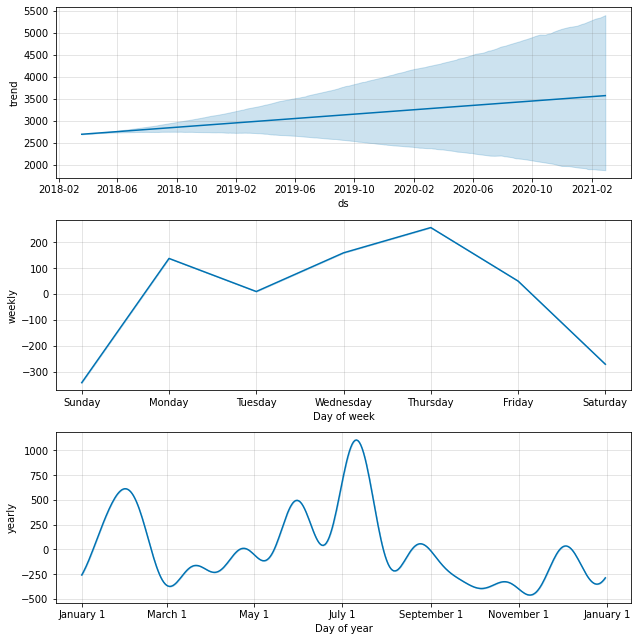

In [23]:
model.plot_components(forecast)

The month of the yearly seasonality that has the highest value is July

# Question 17

In [24]:
model = Prophet()
model.add_regressor("add1")
model.add_regressor("add2")
model.add_regressor("add3")
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
# making predictions for the next 10 months
X_test = test.drop('y', axis=1)
y_test= test['y']
forecast = model.predict(X_test)
pred = forecast['yhat']
forecast[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper' ]].head()



,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1985.365644,-191.856785,4480.490764,1866.664112,1866.664112,1866.664112
1,2018-03-21,1976.703318,-369.218267,4078.198438,1867.349885,1867.349885,1867.349885
2,2018-03-22,2897.096666,573.260890,5005.515975,1868.035658,1868.035658,1868.035658
3,2018-03-23,2581.305545,415.820109,4775.941094,1868.721432,1868.721432,1868.721432
4,2018-03-24,1434.385996,-820.076807,3518.740631,1869.407205,1869.407205,1869.407205


In [26]:
MAPE= mean_absolute_percentage_error(y_test,pred)*100
print("Prophet Model MAPE score on validation set is : {:.2f} ".format(MAPE))

Prophet Model MAPE score on validation set is : 231.28 


# Question 18

In [27]:
RMSE= mean_squared_error(y_test,pred, squared=False)
print("Prophet Model RMSE score on validation set is : {:.2f} ".format(RMSE))

Prophet Model RMSE score on validation set is : 2706.92 


# Question 19

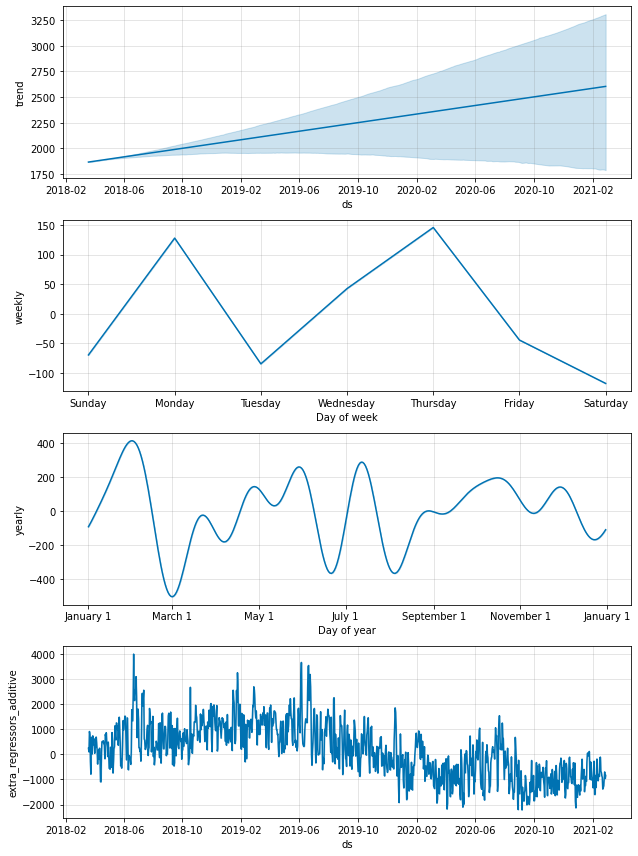

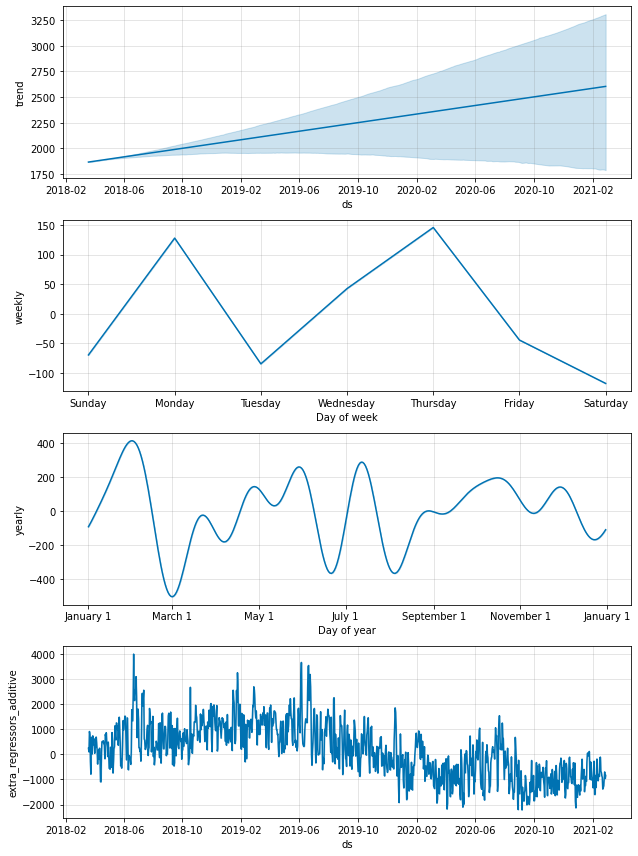

In [28]:
model.plot_components(forecast)

The day of the daily seasonality that has the highest value is Thursday

# Question 20

In [29]:
#Train test split the model
train = train.drop('add2', axis=1)
test = test.drop('add2', axis=1)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [30]:
model = Prophet()
model.add_regressor("add1")
model.add_regressor("add3")
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
# making predictions for the next 10 months
X_test = test.drop('y', axis=1)
y_test= test['y']
forecast = model.predict(X_test)
pred = forecast['yhat']
forecast[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper' ]].head()


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1990.109647,-315.002839,4165.039945,1871.211040,1871.211040,1871.211040
1,2018-03-21,1981.488181,-302.493916,4124.262277,1871.907673,1871.907673,1871.907673
2,2018-03-22,2901.407643,742.378958,5096.864035,1872.604305,1872.604305,1872.604305
3,2018-03-23,2586.203182,354.494646,4678.854702,1873.300938,1873.300938,1873.300938
4,2018-03-24,1438.676772,-702.987803,3680.367692,1873.997570,1873.997570,1873.997570


In [32]:
MAPE= mean_absolute_percentage_error(y_test,pred)*100
print("Prophet Model MAPE score on validation set is : {:.2f} ".format(MAPE))

Prophet Model MAPE score on validation set is : 233.72 


In [33]:
RMSE= mean_squared_error(y_test,pred, squared=False)
print("Prophet Model RMSE score on validation set is : {:.2f} ".format(RMSE))

Prophet Model RMSE score on validation set is : 2709.73 


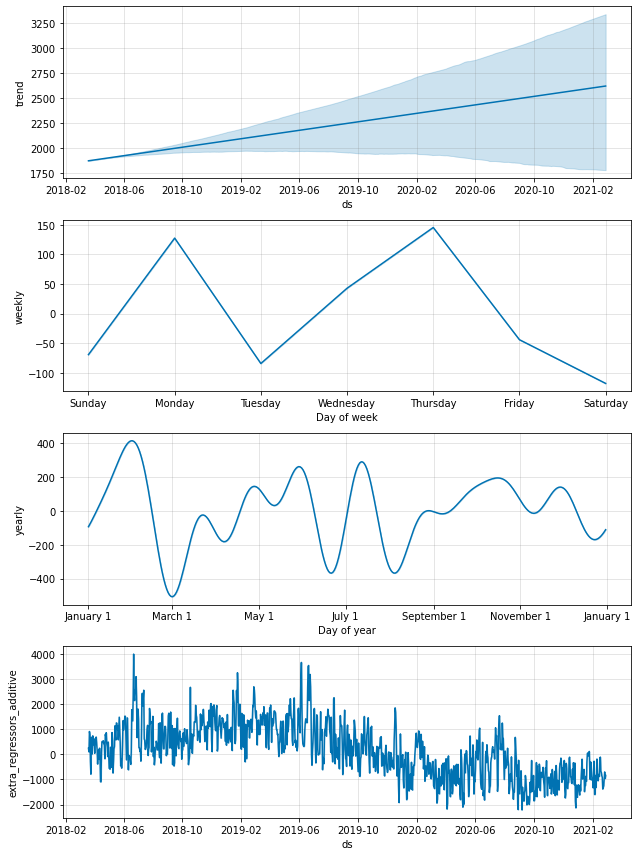

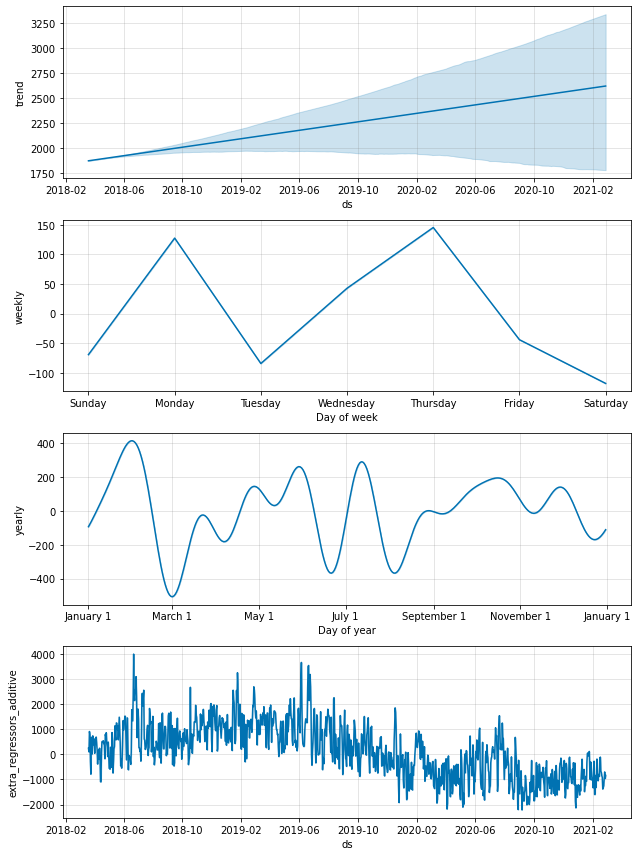

In [34]:
model.plot_components(forecast)